# **library**

In [1]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
%%capture

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn
!pip install keras
!pip install tensorflow
!pip install pretty-confusion-matrix
!pip install kaggle

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
import os
import csv
import json

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning and preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Imbalanced data handling
from imblearn.under_sampling import RandomUnderSampler

# Deep learning with Keras
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv1D, MaxPooling1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import to_categorical, plot_model

# Miscellaneous
from collections import Counter


# **test hardware:**

In [3]:
import tensorflow as tf
import psutil

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Check GPU type
print("\nGPU Information:")
!nvidia-smi

# Check CPU information
print("\nCPU Information:")
!cat /proc/cpuinfo | grep 'model name' | uniq

# Check RAM availability
ram = psutil.virtual_memory()
print(f"\nTotal RAM: {ram.total / (1024 ** 3):.2f} GB")
print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

# Check Disk space
print("\nDisk Space Information:")
!df -h


Num GPUs Available:  0

GPU Information:
/bin/bash: line 1: nvidia-smi: command not found

CPU Information:
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz

Total RAM: 12.67 GB
Available RAM: 11.17 GB

Disk Space Information:
Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   28G   81G  26% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs           6.4G   96K  6.4G   1% /var/colab
/dev/sda1        70G   46G   25G  65% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


# **Download database**

In [4]:
! mkdir ~/.kaggle

In [5]:
# upload kaggle.json after downloading it from your kaggle profile or put that code in the line 5
import json
x = json.dumps ('test')
y = x.encode('utf-8')
with open('kaggle.json', 'w') as f:
  f.write('{"username":"selmazeghad","key":"9c447ca3e559ce066456f2ca0f0ffdbb"}')
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
%%capture
! kaggle datasets download mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot -f "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"
! unzip DNN-EdgeIIoT-dataset.csv.zip

In [7]:
df = pd.read_csv('DNN-EdgeIIoT-dataset.csv', low_memory=False)

# **dataset description**

<ipython-input-8-6d26277b5f08>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0], y='Attack_label', palette=custom_palette, edgecolor=".6", data=df) # bat 1
<ipython-input-8-6d26277b5f08>:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(ax=ax[0], y='Attack_label', palette=custom_palette, edgecolor=".6", data=df) # bat 1
<ipython-input-8-6d26277b5f08>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[1], y='Attack_type', palette=custom_palette, edgecolor=".6", data=df) # bat2
<ipython-input-8-6d26277b5f08>:21: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may pr

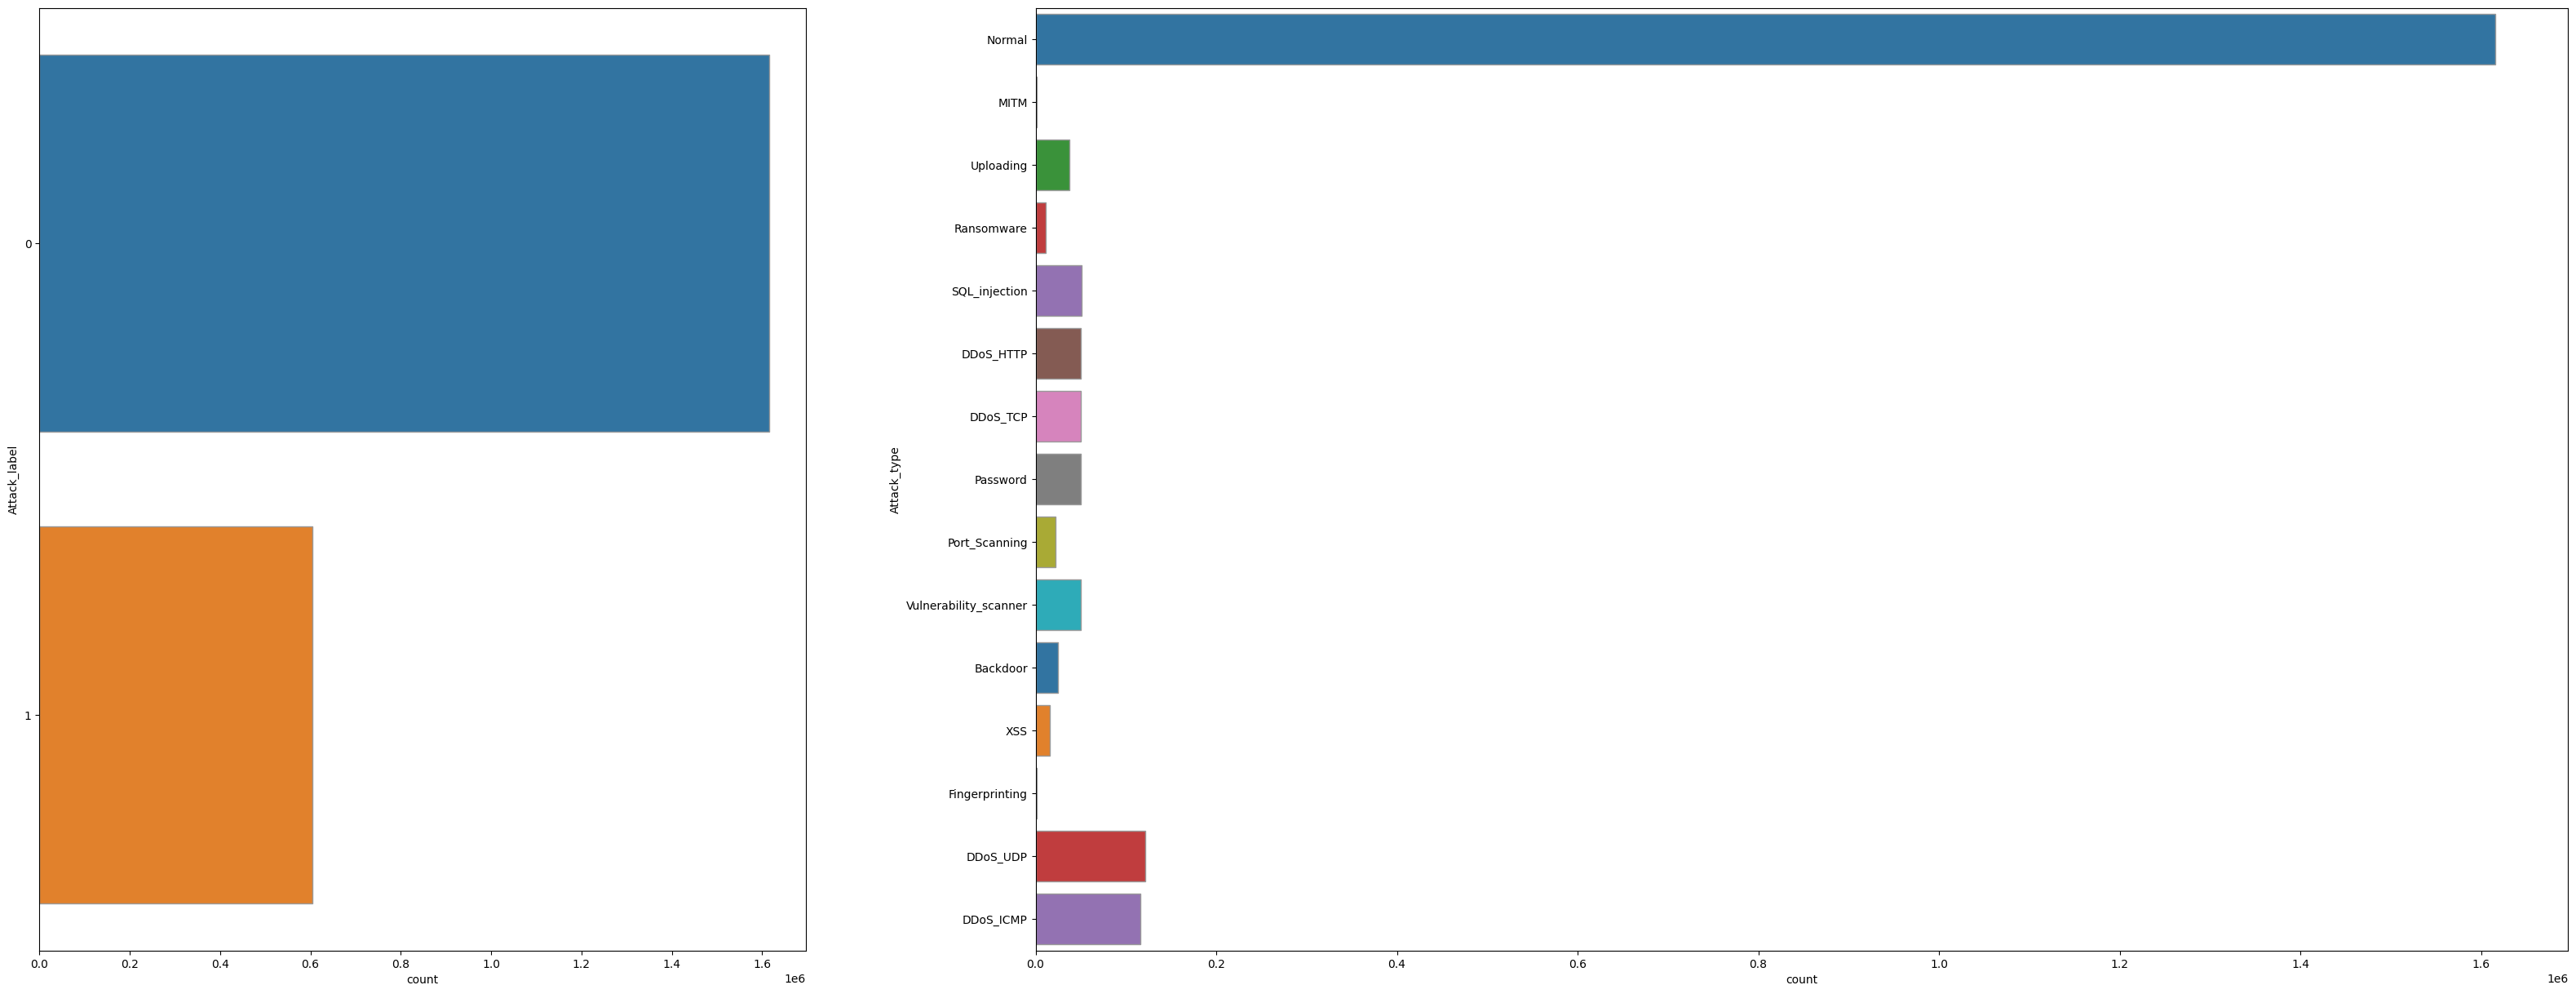

,Attack_type,count,%
0,Backdoor,24862,1.120313
1,DDoS_HTTP,49911,2.249053
2,DDoS_ICMP,116436,5.246753
3,DDoS_TCP,50062,2.255857
4,DDoS_UDP,121568,5.478008
5,Fingerprinting,1001,0.045106
6,MITM,1214,0.054704
7,Normal,1615643,72.802914
8,Password,50153,2.259958
9,Port_Scanning,22564,1.016762


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def display_type_cells(df, size):
    df_datatypes = pd.DataFrame(df.dtypes)
    value_display = ""
    for i in range(0, df_datatypes.shape[0], size):
        if i + size < df_datatypes.shape[0]:
            value_display += df_datatypes[i:i+size].style.set_table_attributes("style='display:inline'").set_caption('')._repr_html_()
        else:
            value_display += df_datatypes[i:].style.set_table_attributes("style='display:inline'").set_caption('')._repr_html_()
    display_html(value_display, raw=True)

def plot_count_dataset(df):
    # Define custom color palette with various colors
    custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

    fig, ax = plt.subplots(1, 2, figsize=(40, 15), gridspec_kw={'width_ratios': [1, 2]})
    sns.countplot(ax=ax[0], y='Attack_label', palette=custom_palette, edgecolor=".6", data=df) # bat 1
    sns.countplot(ax=ax[1], y='Attack_type', palette=custom_palette, edgecolor=".6", data=df) # bat2
    plt.show()

def display_count_dataset(df, attack):
    n_by_state = df.groupby(attack)[attack].count().reset_index(name="count")
    n_by_state['%'] = 100 * n_by_state['count'] / n_by_state['count'].sum()
    total = n_by_state.sum(numeric_only=True)
    total.name = 'Total'
    if attack == "Attack_label":
        total['Attack_label'] = ''
        n_by_state.at[0, 'Attack_label'] = 'normal'
        n_by_state.at[1, 'Attack_label'] = 'attack'
    elif attack == "Attack_type":
        total['Attack_type'] = ''
    return n_by_state

# Example usage:
plot_count_dataset(df)
display_count_dataset(df, 'Attack_label')
display_count_dataset(df, 'Attack_type')


Attack_label Count %
  Attack_label    count          %
0       normal  1615643  72.802914
1       attack   603558  27.197086


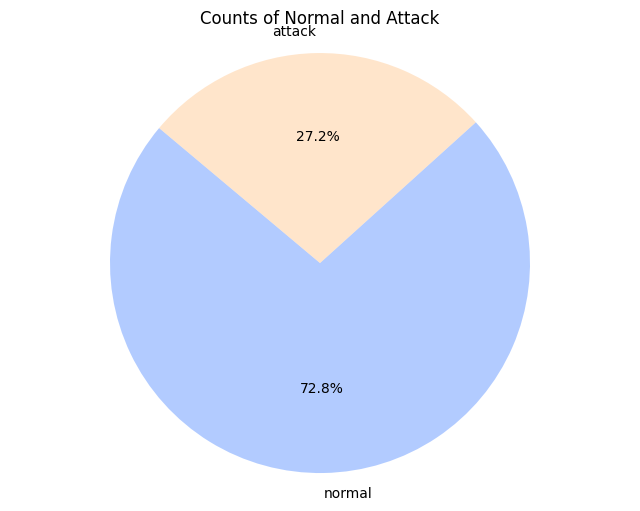

In [9]:
import matplotlib.pyplot as plt

# Use the function to get the counts and percentages
count_df = display_count_dataset(df, 'Attack_label')

# Print the counts and percentages
print("Attack_label Count %")
print(count_df)

# Define lighter colors
colors = [(0.4, 0.6, 1.0, 0.5), (1.0, 0.8, 0.6, 0.5)]  # Light blue and light orange

# Plotting counts as pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_df['count'], labels=count_df['Attack_label'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Counts of Normal and Attack')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **Dataset preproccesing**

In [10]:
from sklearn.utils import shuffle

# Define columns to drop
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

# Drop specified columns
df.drop(drop_columns, axis=1, inplace=True)

# Remove rows with any missing values
df.dropna(axis=0, how='any', inplace=True)

# Remove duplicate rows
df.drop_duplicates(subset=None, keep="first", inplace=True)

# Shuffle the DataFrame
df = shuffle(df)

# Filter out specific attack types
attack_types_to_drop = ['SQL_injection', 'Vulnerability_scanner', 'Password', 'Uploading', 'Backdoor',
                        'Port_Scanning', 'XSS', 'Ransomware', 'Fingerprinting', 'MITM']
df = df[~df['Attack_type'].isin(attack_types_to_drop)]

# Check the distribution of attack types
attack_type_counts = df['Attack_type'].value_counts()
print("Distribution of Attack Types:")
print(attack_type_counts)

# Get the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)


Distribution of Attack Types:
Attack_type
Normal       1363998
DDoS_UDP      121567
DDoS_ICMP      67939
DDoS_TCP       50062
DDoS_HTTP      48544
Name: count, dtype: int64
Shape of the DataFrame:
(1652110, 48)


In [11]:
# Encode features with type object to features with type float ( mendatory)
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [12]:
df.shape

(1652110, 78)

In [13]:
# Apply Median Filtering to all features
window_size_median = 3  # Window size for median filtering
for feature in df.columns:
    if feature != 'Attack_type':  # Exclude the label column
        df[feature + '_median_filtered'] = df[feature].rolling(window=window_size_median, center=True).median()

# Apply Standard Deviation-based Filtering to all features
threshold_std = 3  # Threshold for standard deviation-based filtering
for feature in df.columns:
    if feature != 'Attack_type':  # Exclude the label column
        mean = df[feature].mean()
        std = df[feature].std()
        upper_bound = mean + threshold_std * std
        lower_bound = mean - threshold_std * std
        df[feature + '_std_filtered'] = df[feature].apply(lambda x: x if (lower_bound <= x <= upper_bound) else None)

# Drop original features that were filtered
df.drop(df.columns[df.columns.str.endswith('_filtered')], axis=1, inplace=True)

df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False)
df.shape


<ipython-input-13-10ce8e80355f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature + '_median_filtered'] = df[feature].rolling(window=window_size_median, center=True).median()
<ipython-input-13-10ce8e80355f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature + '_median_filtered'] = df[feature].rolling(window=window_size_median, center=True).median()
<ipython-input-13-10ce8e80355f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

(1652110, 78)

In [14]:
df['Attack_type'].value_counts()
df.shape


(1652110, 78)

In [15]:
df.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port',
       'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type',
       'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len',
       'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'Attack_type',
       'http.request.method-0', 'http.request.method-0.0',
       'http.request.method-GET', 'http.referer-0', 'http.referer-0.0',
       'http.referer-TESTING_PURPOSES_ONLY', 'http.request.version-0',
       'ht

In [16]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)

empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [17]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

df[skip_list[3]].value_counts()


mqtt.msg_decoded_as
0.0    1652110
Name: count, dtype: int64

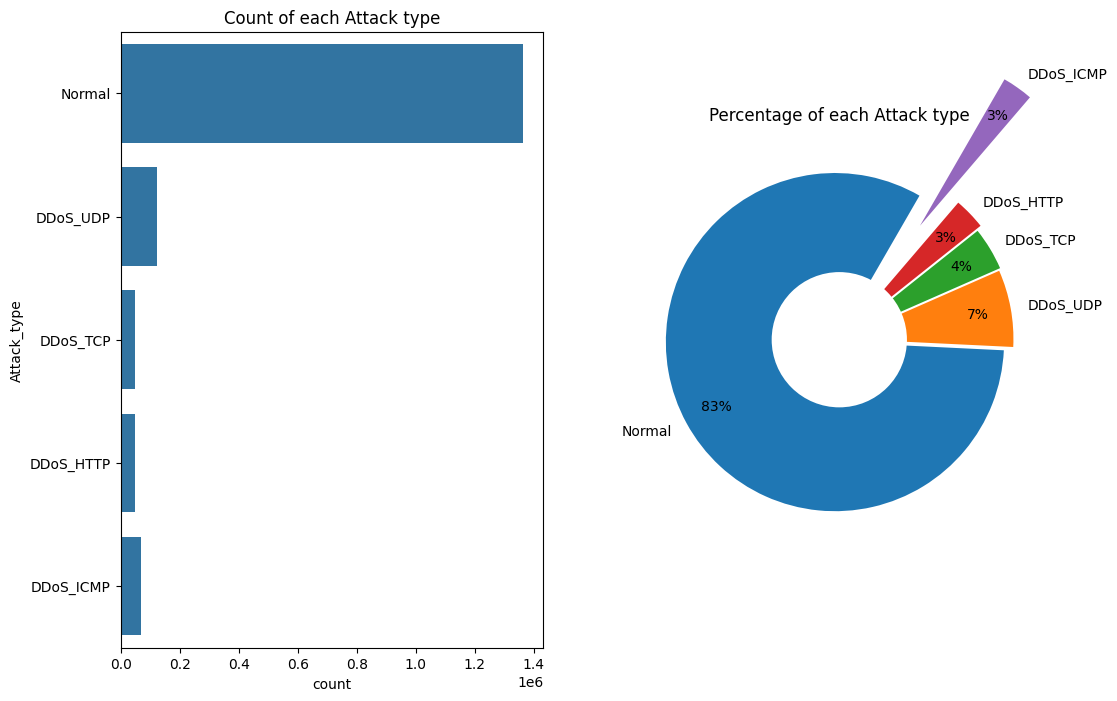

In [18]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

          arp.opcode    arp.hw.size  icmp.checksum    icmp.seq_le  \
count  576224.000000  576224.000000  576224.000000  576224.000000   
mean        0.000014       0.000052    3865.494644    4518.184486   
std         0.004929       0.017674   12407.211532   13264.371660   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         2.000000       6.000000   65533.000000   65535.000000   

       icmp.unused  http.content_length  http.response  http.tls_port  \
count     576224.0        576224.000000  576224.000000       576224.0   
mean           0.0             0.365042       0.001218            0.0   
std            0.0            10.452473       0.034883            0.0   
min            0.0             0.000000       0.000000            0.0   
25%          

<ipython-input-19-04c8eddd3fd2>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0], y='Attack_label', palette="pastel", edgecolor=".6", data=df)
<ipython-input-19-04c8eddd3fd2>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[1], y='Attack_type', palette="pastel", edgecolor=".6", data=df)


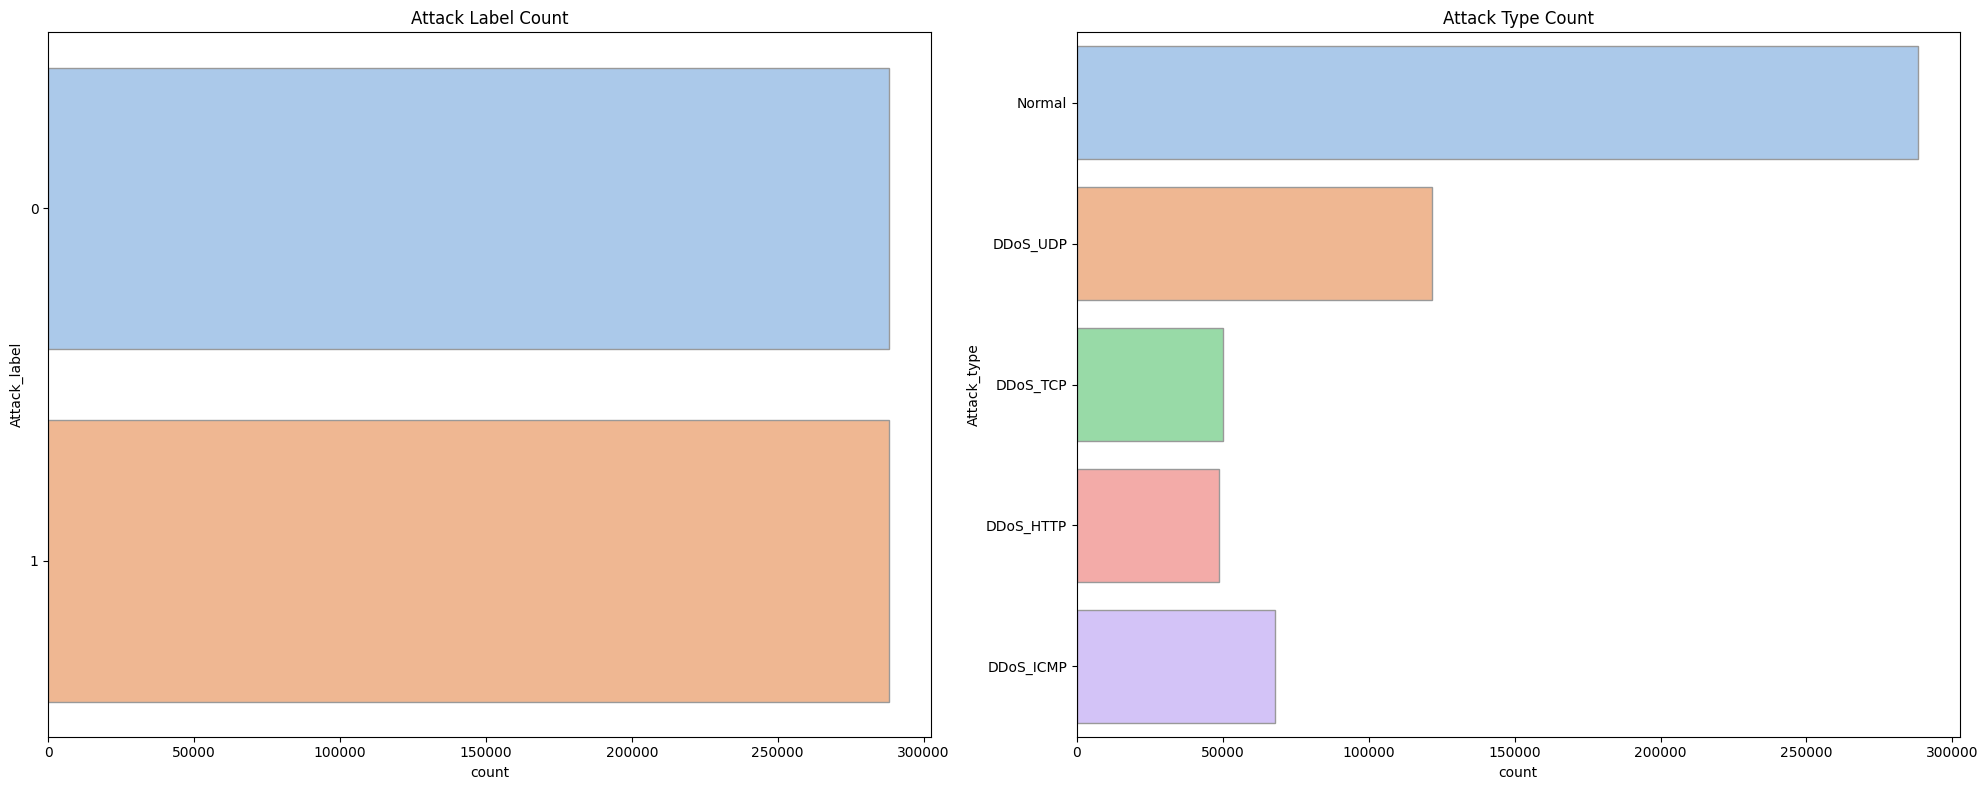

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


def display_type_celles(df, size): # size is the maximum number of rows
    df_datatypes = pd.DataFrame(df.dtypes)
    value_display = ""
    for i in range(0, df_datatypes.shape[0], size):
        if i + size < df_datatypes.shape[0]:
            value_display += df_datatypes[i:i+size].style\
                .set_table_attributes("style='display:inline'")\
                .set_caption('')\
                ._repr_html_()
        else:
            value_display += df_datatypes[i:].style\
                .set_table_attributes("style='display:inline'")\
                .set_caption('')\
                ._repr_html_()
    print(value_display)

def affiche_dataset_informations(df, size):
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    print(df.describe())
    print(df.head(3))
    display_type_celles(df, size)

def plot_count_dataset(df):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    sns.countplot(ax=ax[0], y='Attack_label', palette="pastel", edgecolor=".6", data=df)
    sns.countplot(ax=ax[1], y='Attack_type', palette="pastel", edgecolor=".6", data=df)

    ax[0].set_title('Attack Label Count')
    ax[1].set_title('Attack Type Count')

    plt.tight_layout()
    plt.show()

def display_count_dataset(df, attack):
    n_by_state = df.groupby(attack)[attack].count().reset_index(name="count")
    n_by_state['%'] = 100 * n_by_state['count'] / n_by_state['count'].sum()
    total = n_by_state.sum()
    total.name = 'Total'

    if attack == "Attack_label":
        n_by_state.at[0, 'Attack_label'] = 'normal'
        n_by_state.at[1, 'Attack_label'] = 'attack'

    n_by_state = n_by_state.append(total.transpose())
    return n_by_state

def undersample(df):
    # Separate majority and minority classes
    df_majority = df[df['Attack_label'] == 0]
    df_minority = df[df['Attack_label'] == 1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority,
                                       replace=False,     # Sample without replacement
                                       n_samples=len(df_minority),    # to match minority class
                                       random_state=42)   # reproducible results

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])

    return df_downsampled

# Assuming df is your dataframe
# Perform undersampling
df_downsampled = undersample(df)

# Display information about the dataset
affiche_dataset_informations(df_downsampled, size=10)

# Plot count of 'Attack_label' and 'Attack_type'
plot_count_dataset(df_downsampled)


In [111]:
X =  df_downsampled.drop([label_col], axis=1)
y =  df_downsampled[label_col]


In [112]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif





# Feature selection using SelectKBest with ANOVA F-value as the scoring function
num_features_to_select = 21  # Select top 10 features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  7 23 31 39 41 44 47 50 59 61 63 65 66 67 68 70 72 75] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected Features:
Index(['icmp.checksum', 'icmp.seq_le', 'tcp.checksum', 'tcp.flags',
       'tcp.flags.ack', 'udp.stream', 'Attack_label', 'http.request.method-0',
       'http.request.method-0.0', 'http.referer-0', 'http.referer-0.0',
       'http.request.version-0', 'http.request.version-0.0',
       'dns.qry.name.len-0', 'dns.qry.name.len-0.0', 'mqtt.conack.flags-0',
       'mqtt.conack.flags-0.0', 'mqtt.protoname-0', 'mqtt.protoname-0.0',
       'mqtt.topic-0', 'mqtt.topic-0.0'],
      dtype='object')


In [113]:
from sklearn.model_selection import train_test_split


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

label_encoder.classes_

array(['DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP', 'Normal'],
      dtype=object)

In [115]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)



Class distribution before SMOTE: Counter({4: 230484, 3: 97261, 1: 54365, 2: 40112, 0: 38757})
Class distribution after SMOTE: Counter({4: 230484, 1: 230484, 0: 230484, 3: 230484, 2: 230484})


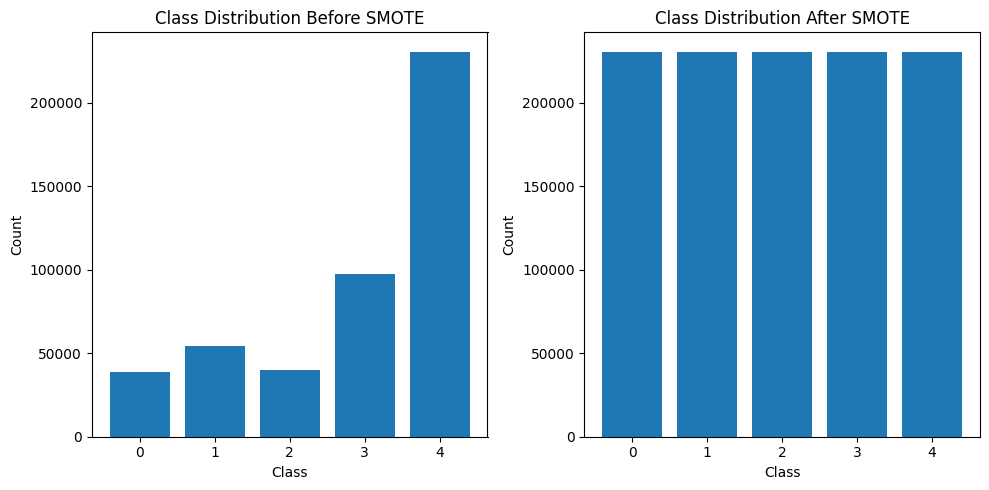

In [116]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
class_distribution_before = Counter(y_train)
class_distribution_after = Counter(y_train_resampled)

print("Class distribution before SMOTE:", class_distribution_before)
print("Class distribution after SMOTE:", class_distribution_after)

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.keys(), class_distribution_before.values())
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.keys(), class_distribution_after.values())
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [117]:
X_train = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape)
print(X_test.shape)

(1152420, 21, 1)
(115245, 21, 1)


In [118]:
input_shape = X_train.shape[1:]

print(X_train.shape, X_test.shape)
print(input_shape)

(1152420, 21, 1) (115245, 21, 1)
(21, 1)


In [119]:
num_classes = len(np.unique(y_train))
num_classes


5

In [120]:
from  tensorflow.keras.utils import to_categorical

y_train = to_categorical( y_train_resampled, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(y_train.shape, y_test.shape)

(1152420, 5) (115245, 5)


#**Cnn_Lstm_Gru model**

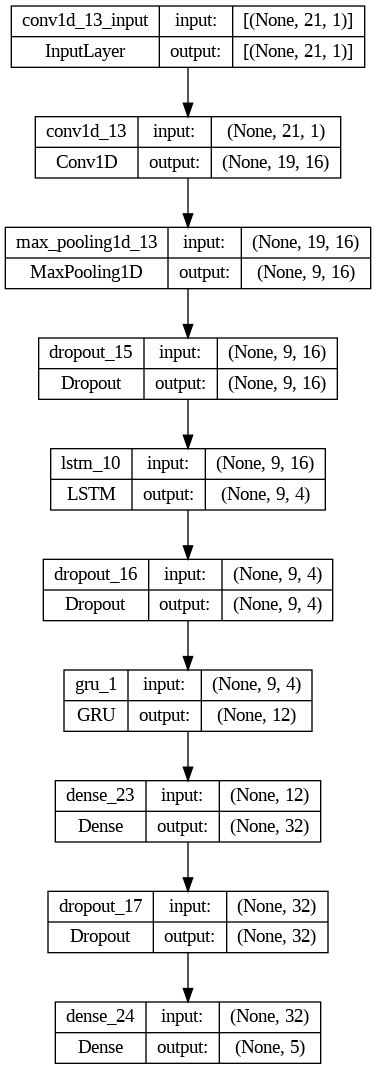

In [141]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, GRU, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

def simplified_cnn_lstm_gru_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),

        LSTM(4, return_sequences=True, kernel_regularizer=l2(0.01)),
        Dropout(0.5),

        GRU(12, return_sequences=False, kernel_regularizer=l2(0.01)),


        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    return model, early_stopping

# Assuming you have input_shape and num_classes defined somewhere
model, early_stopping = simplified_cnn_lstm_gru_model(input_shape, num_classes)


# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [142]:
import tensorflow as tf

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss= tf.keras.metrics.categorical_crossentropy,
                  metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0)
#plotlosses = PlotLossesKeras()
call_backs = [lr_reduce]
EPOCHS = 15
BATCH_SIZE = 5000

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),

                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,

                    #class_weight=class_weights,
                    verbose=1)


# Save the trained model
model.save('model.h3')


Epoch 1/15
231/231 [==============================] - 40s 145ms/step - loss: 1.6323 - accuracy: 0.3184 - val_loss: 0.9787 - val_accuracy: 0.7012
Epoch 2/15
231/231 [==============================] - 30s 131ms/step - loss: 1.0405 - accuracy: 0.5316 - val_loss: 0.4777 - val_accuracy: 0.8462
Epoch 3/15
231/231 [==============================] - 31s 135ms/step - loss: 0.7479 - accuracy: 0.7038 - val_loss: 0.3318 - val_accuracy: 0.9166
Epoch 4/15
231/231 [==============================] - 30s 132ms/step - loss: 0.6158 - accuracy: 0.7773 - val_loss: 0.2740 - val_accuracy: 0.9363
Epoch 5/15
231/231 [==============================] - 30s 132ms/step - loss: 0.5435 - accuracy: 0.8135 - val_loss: 0.2298 - val_accuracy: 0.9540
Epoch 6/15
231/231 [==============================] - 31s 133ms/step - loss: 0.5018 - accuracy: 0.8310 - val_loss: 0.2030 - val_accuracy: 0.9618
Epoch 7/15
231/231 [==============================] - 30s 132ms/step - loss: 0.4716 - accuracy: 0.8432 - val_loss: 0.1932 - val_ac

# **Results**

In [143]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=256)

451/451 [==============================] - 4s 8ms/step - loss: 0.1337 - accuracy: 0.9705


In [144]:
def plot_loss(history):
  training_loss = history.history['loss']
  test_loss = history.history['val_loss']
  epoch_count = range(1, len(training_loss) + 1)
  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, test_loss, 'b-')
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show();

def plot_accuracy(history):
  training_accuracy = history.history['accuracy']
  test_accuracy = history.history['val_accuracy']
  epoch_count = range(1, len(training_accuracy) + 1)
  plt.plot(epoch_count, training_accuracy, 'r--')
  plt.plot(epoch_count, test_accuracy, 'b-')
  plt.legend(['Training Accuracy', 'Validation Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show();

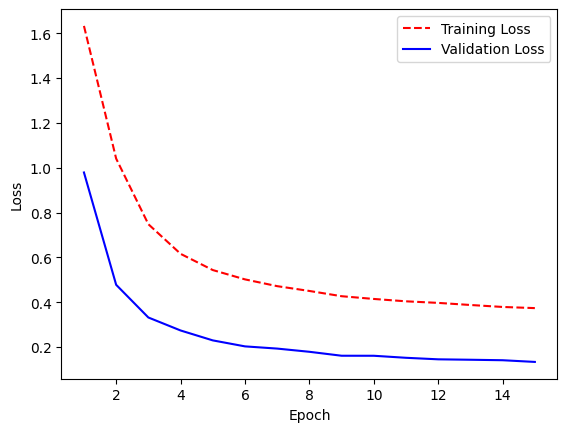

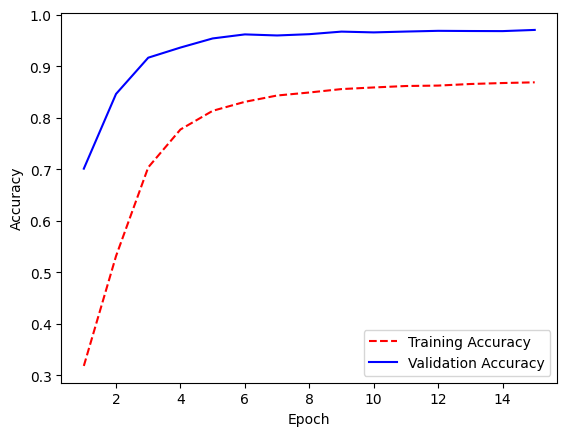

In [145]:
plot_loss(history)
plot_accuracy(history)

In [146]:
# Use the trained model to make predictions on the test set
y_hat = model.predict(X_test)

# Convert the predictions to class labels by selecting the index with the highest probability
y_hat = np.argmax(y_hat, axis=1)

# Print the predicted class labels
print("Predicted class labels:", y_hat)


3602/3602 [==============================] - 22s 6ms/step
Predicted class labels: [4 4 3 ... 4 4 4]


In [147]:
y_true = np.argmax(y_test, axis=1)

In [148]:
model = load_model('model.h3')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

3602/3602 [==============================] - 12s 3ms/step
Precision: 0.9760290788225493
Recall: 0.9705063126382923
F1-score: 0.9712247636573977
Confusion Matrix:
 [[ 9787     0     0     0     0]
 [    0 13574     0     0     0]
 [    0  1523  8427     0     0]
 [    0  1724    84 22498     0]
 [    0    68     0     0 57560]]


In [149]:
from sklearn.metrics import accuracy_score
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
print_score(y_hat, y_true, label_encoder)

Accuracy:  0.9705063126382923


In [150]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_hat)

class_labels = [ 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
                 'Normal']


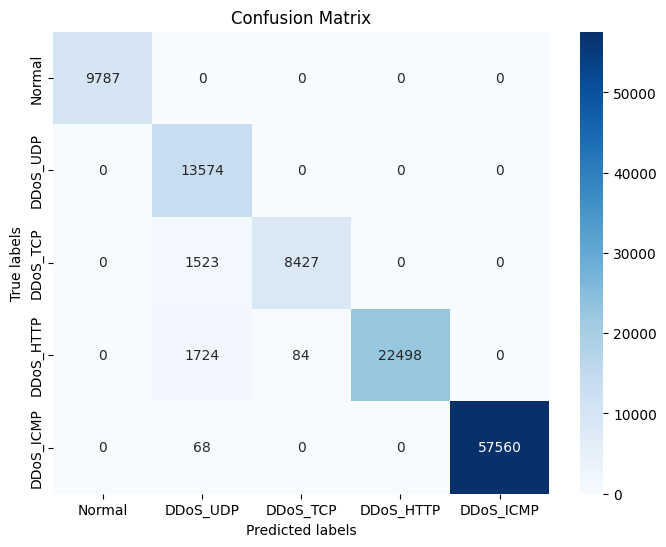

In [151]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

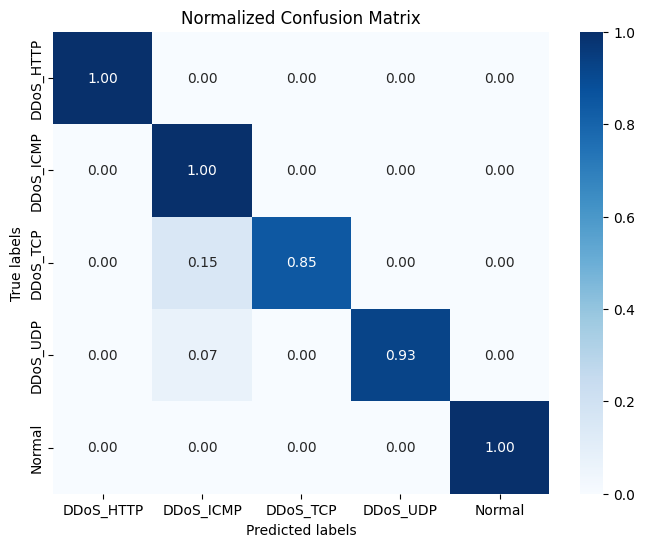

In [152]:
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, cmap="Blues", fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()


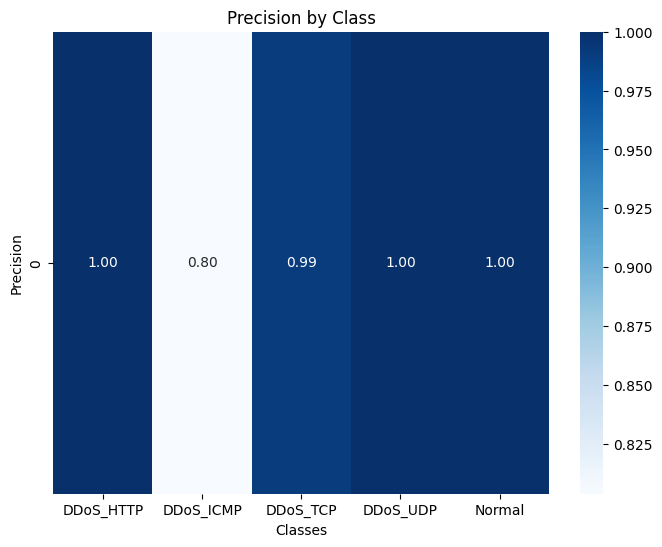

In [153]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(precision.reshape(1, -1), annot=True, cmap="Blues", fmt=".2f", xticklabels=class_labels)
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.show()


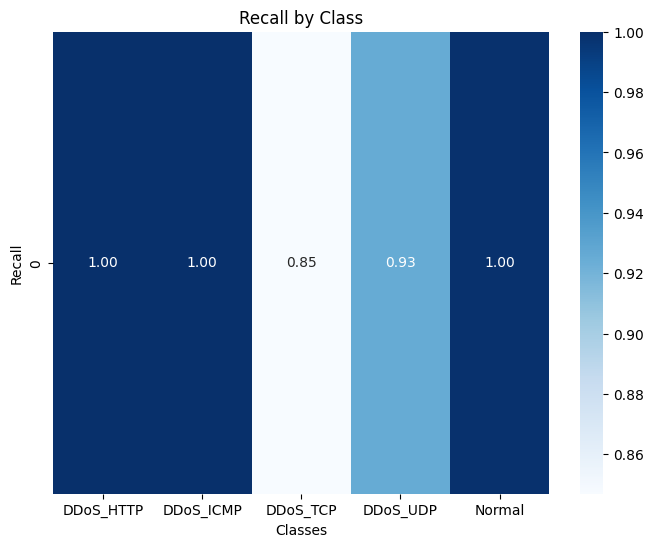

In [154]:
plt.figure(figsize=(8, 6))
sns.heatmap(recall.reshape(1, -1), annot=True, cmap="Blues", fmt=".2f", xticklabels=class_labels)
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.show()

In [155]:
from sklearn.metrics import classification_report

class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_labels)

print(class_report)


              precision    recall  f1-score   support

   DDoS_HTTP       1.00      1.00      1.00      9787
   DDoS_ICMP       0.80      1.00      0.89     13574
    DDoS_TCP       0.99      0.85      0.91      9950
    DDoS_UDP       1.00      0.93      0.96     24306
      Normal       1.00      1.00      1.00     57628

    accuracy                           0.97    115245
   macro avg       0.96      0.95      0.95    115245
weighted avg       0.98      0.97      0.97    115245



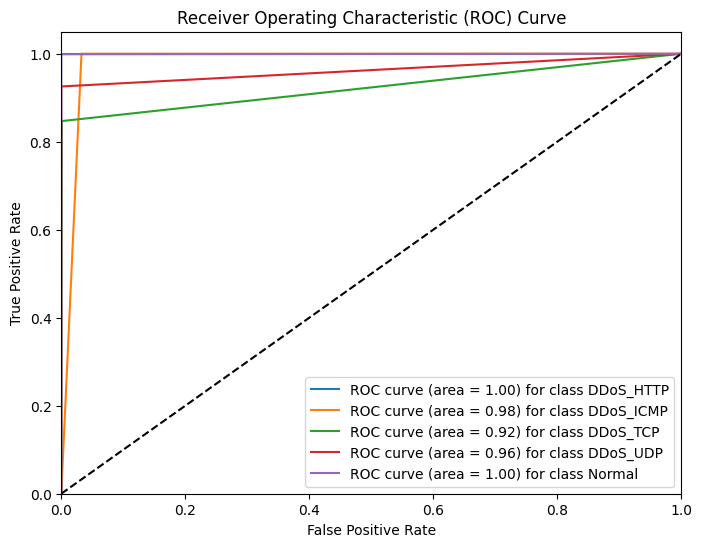

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve((y_true_classes == i), (y_pred_classes == i))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], class_labels[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
